## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 3: Real Analysis
## Due 23 October, 2019 at 6:00 PM
### <span style="color: red">YOUR NAME HERE</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebook for lecture 3. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory subset the general subject of Real Analysis, for example covered in the book [An Introduction to Real Analysis](https://www.math.ucdavis.edu/~hunter/intro_analysis_pdf/intro_analysis.html). You do not need to read all of this book (although doing so would be great), but you should at least read the following sections.
  - [Chapter 3](https://www.math.ucdavis.edu/~hunter/intro_analysis_pdf/ch3.pdf), Sections 3.2, 3.3, and 3.4. You can skip the proofs if you want to. 
  - [Chapter 6](https://www.math.ucdavis.edu/~hunter/intro_analysis_pdf/ch6.pdf), Sections 6.1 and 6.3.
  - [Chapter 7](https://www.math.ucdavis.edu/~hunter/intro_analysis_pdf/ch7.pdf), Sections 7.1, 7.2, and 7.6.
  - [Chapter 8](https://www.math.ucdavis.edu/~hunter/intro_analysis_pdf/ch8.pdf), Sections 8.1, 8.2, 8.3, 8.5, 8.6, and 8.8.
  - [Chapter 11](https://www.math.ucdavis.edu/~hunter/intro_analysis_pdf/ch8.pdf), Sections 11.1, 11.2, and 11.5.
  
  
-  <span style="color: #F5793A;">**Warning:** My notes attempt to make sure no concepts require other concepts that were not yet covered. However, if you just skim the above, you will likely encounter definitions that use other definitions in sections I did not suggest you read.</span>
- If the textbook above is not clear to you, you might try looking at alternative textbooks, such as the [one by Jiri Lebl](https://www.jirka.org/ra/realanal.pdf).
- If you would like to buy a textbook on real analysis, here are a few:
  - [Rudin](https://www.amazon.com/Principles-Mathematical-Analysis-International-Mathematics/dp/007054235X). Very concise. 
  - [Strichartz](https://www.amazon.com/Analysis-Revised-Jones-Bartlett-Mathematics/dp/0763714976/ref=sr_1_1?keywords=Strichartz%27s+book+%22The+way+of+analysis&qid=1570552954&s=books&sr=1-1). Gentler.
  - [Kolmogorov](https://www.amazon.com/Introductory-Analysis-Dover-Books-Mathematics/dp/0486612260/ref=sr_1_1?keywords=Kolmogorov+real+analysis&qid=1570553008&s=books&sr=1-1). A classic!

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sympy as sm
from math import factorial
import seaborn as sns
sm.init_printing(use_latex='mathjax')
%matplotlib inline
sns.set() #Fancy looking plots

x, k, m = sm.symbols('x k m')

### 1. Sequences (10pts)

For each of the patterns below, define a formula for $n$th term $x_n$ of the sequence. Also, plot the first 20 terms of the sequences. Combine all three plots into a figure using the subplot command. Label everything.

a) 5,7,9,11,...

b) 1/2, 2/3, 3/4, 4/5, ...

c) 1/2, -1/4, 1/8, -1/16, ...

$\textbf{Grading breakdown:}$

    2pts per sequence for determining the formula in Latex
    2pts for plotting them together through subplot
    2pts for labeling everything

1.a) $x_n = 5 + 2n$, where $n\in \mathbb{N}$.

1.b) $x_n = \frac{n+1}{n+2}$, where $n\in \mathbb{N}$.

1.c) $x_n = \frac{(-1)^{n}}{2^{n+1}},$ where $n\in \mathbb{N}$.

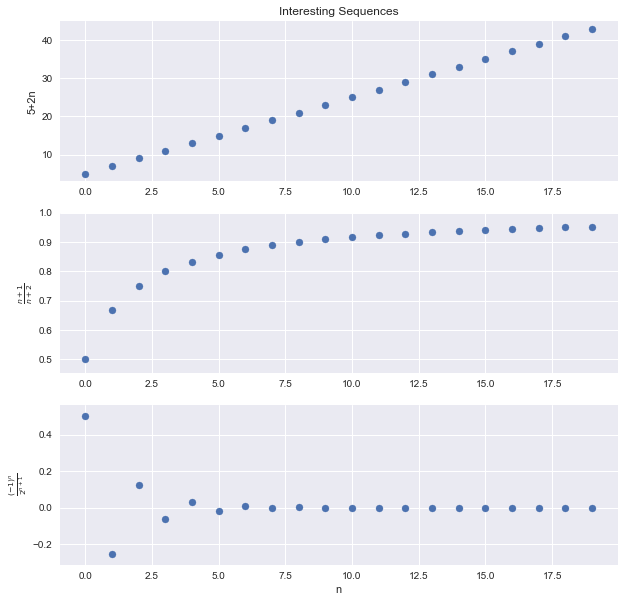

In [2]:
a = [5+2*n for n in range(0,20)]
b = [(n+1)/(n+2) for n in range(0,20)]
c = [(-1)**n/2**(n+1) for n in range(0,20)]


t = np.arange(0,20)
fig,ax = plt.subplots(3,1, figsize=(10,10))
ax[0].scatter(t,a); ax[0].set_title("Interesting Sequences"); ax[0].set_ylabel('5+2n'); ax[0].grid('on')
ax[1].scatter(t,b); ax[1].set_ylabel(r'$\frac{n+1}{n+2}$'); ax[1].grid('on')
ax[2].scatter(t,c); ax[2].set_ylabel(r'$\frac{(-1)^n}{2^{n+1}}$'); ax[2].grid('on')
plt.xlabel('n')
plt.show()

### 2. Sequence Convergence (10pts)

Show that the following limits using either an $\varepsilon$ argument or **Thm 1** from the lecture notes. 

a) $\lim \limits_{n\rightarrow \infty} \frac{3n+1}{2n+5} = \frac{3}{2}$

b) $\lim \limits_{n\rightarrow \infty} \frac{2n}{n+2} = 2$

c) $\lim \limits_{n\rightarrow \infty} \left(\frac{1}{n} - \frac{1}{n+1} \right) = 0$

$\textbf{Grading breakdown:}$

    3pts using the Archimedian Thm OR for picking a K that satisfies (a) and providing a formal epsilon-proof (or using Thm 1)
    3pts using the Archimedian Thm OR for picking a K that satisfies (b) and providing a formal epsilon-proof (or using Thm 1)
    4pts using the Archimedian Thm OR for picking a K that satisfies (c) and providing a formal epsilon-proof (or using Thm 1)

2.a) 

Fix any $\epsilon > 0$ and set $K = \frac{13 - 10 \epsilon}{4 \epsilon} = \frac{13}{4 \epsilon} - \frac{5}{2}$ (note that K isn't strictly a natural number here, but that's okay since $n$ is at least the nearest natural number that's bigger than K). Then for any $n > K$ we see that

$$\begin{align}
    \lvert \frac{3n + 1}{2n + 5} - \frac{3}{2} \rvert &= \lvert \frac{13}{4n + 10} \rvert \\
    & < \frac{13}{4K + 10} \\
    & = \frac{13}{4 (\frac{13 - 10 \epsilon}{4 \epsilon}) + 10} \\
    & = \epsilon.
\end{align}$$

Thus, we have shown that $$\lvert \frac{3n+1}{2n+5} - \frac{3}{2} \rvert < \epsilon.$$

2.b)

Fix any $\epsilon > 0$ and let $K = (\frac{4}{\epsilon} - 2)$. (To be explicit, $K \leq (\lfloor\frac{4}{\epsilon}\rfloor - 1)\in \mathbb{N}$ could be the natural number we pick.) Then for any $n > K$ we see that

$$\begin{align}
    \lvert \frac{2n}{n + 2} - 2 \rvert &= \lvert \frac{-4}{n + 2} \rvert \\
    & < \frac{4}{K + 2} \\
    & = \frac{4}{(\frac{4}{\epsilon} - 2) + 2} \\
    & = \epsilon.
\end{align}$$

Thus, we have shown that $$\lvert \frac{2n}{n + 2} - 2 \rvert < \epsilon.$$

2.c) 

Proof 1:

Using limit laws we see that: $\lim \limits_{n\rightarrow \infty} \left(\frac{1}{n} - \frac{1}{n+1} \right) = \lim \limits_{n\rightarrow \infty} \frac{1}{n} - \lim \limits_{n\rightarrow \infty} \frac{1}{n+1} = 0$. Thus, we consider each term separately.

Fix any $\epsilon > 0$ and set $K = \frac{1}{\epsilon}$. Then for any $n > K$ we see that

$$\begin{align}
    \lvert \frac{1}{n} - 0 \rvert &= \lvert \frac{1}{n} \rvert \\
    & < \frac{1}{K} \\
    & = \frac{1}{(\frac{1}{\epsilon})} \\
    & = \epsilon.
\end{align}$$

Next, fix any $\epsilon > 0$ and set $K = \frac{1}{\epsilon} - 1$. Then for any $n > K$ we see that

$$\begin{align}
    \lvert \frac{1}{n+1} - 0 \rvert &= \lvert \frac{1}{n+1} \rvert \\
    & < \frac{1}{K+1} \\
    & = \frac{1}{(\frac{1}{\epsilon}-1)+1} \\
    & = \epsilon.
\end{align}$$

Thus, we have shown that 
$$\begin{align}
\lvert (\frac{1}{n} - \frac{1}{n+1}) -0 \rvert &= \lvert (\frac{1}{n} - \frac{1}{n+1}) \rvert \\
& \leq \lvert \frac{1}{n} - 0 \rvert + \lvert \frac{1}{n+1} -0 \rvert \text{ via triangle inequality}\\
&< \epsilon.
\end{align}$$

Proof 2:

Observe that $\lim \limits_{n\rightarrow \infty} \left(\frac{1}{n} - \frac{1}{n+1} \right) = \lim \limits_{n\rightarrow \infty} \frac{1}{n(n+1)}$. Thus, we can fix any $\epsilon > 0$ and choose a $K = \frac{1}{\sqrt{\epsilon}}$. Then for any $n > K$ we see that

$$\begin{align}
\lvert (\frac{1}{n} - \frac{1}{n+1}) -0 \rvert &= \frac{1}{n(n+1)} \\
&= \frac{1}{n^2 + n} \\
&< \frac{1}{n^2} \\
&< \frac{1}{K^2} \\
&= \frac{1}{(\frac{1}{\sqrt{\epsilon}})^2} \\
&= \epsilon.
\end{align}$$

Alternative proof for instructional purposes (doesn't use Thm1 or an $\epsilon$ argument):

Alternatively, observe that $\lim \limits_{n\rightarrow \infty} \left(\frac{1}{n} - \frac{1}{n+1} \right) = \lim \limits_{n\rightarrow \infty} \frac{1}{n(n+1)}$. If we choose $a_n = 0 \rightarrow 0$ and $b_n = \frac{1}{n} \rightarrow 0$, then $a_n \leq \frac{1}{n(n+1)} \leq b_n$. Thus, by the squeeze theorem, $\lim \limits_{n\rightarrow \infty} \frac{1}{n(n+1)} = 0$.

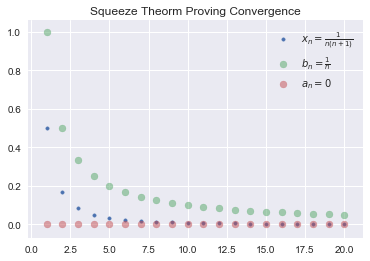

In [3]:
n = np.arange(1,21)
xn = np.asarray([1 / (i*(i+1)) for i in n])
bn = np.asarray([1 / i for i in n])
an = np.asarray([0 for i in n])
plt.scatter(n, xn, marker='.')
plt.scatter(n, bn, alpha=0.5)
plt.scatter(n, an, alpha=0.5)
plt.legend([r'$x_n=\frac{1}{n(n+1)}$',r'$b_n=\frac{1}{n}$',r'$a_n=0$'])
plt.title('Squeeze Theorm Proving Convergence')
plt.show();

### 3. Proving non-convergence (10pts)

Show that the sequence $(x_n)$ where $x_n = (-1)^n$ does not converge to any number $c$. Use the definition of limit for sequences. Given $\varepsilon > 0$ you have to show that there does not exist an $m$ such that for all $n>m$ such that $c-\varepsilon < x_n < c+\varepsilon$. 

Assume $x_n = (-1)^n$ does converge, and let $\epsilon = \frac{1}{2}.$ If $n$ is even, then $|1 - c| < \frac{1}{2},$ and if $n$ is odd, then $|-1 - c| < \frac{1}{2}.$ Then by the triangle inequality, $$2 = |(1-c) + (1+c)| \leq |1-c| + |1+c| < \frac{1}{2} + \frac{1}{2} = 1.$$ Hence, $2<1$ which is a contradiction.

$\textbf{Grading breakdown:}$

    6pts for convincingly showing that the sequence does not converge (i.e. via contradiction, directly via limit DNE, etc)
    2pts for using the definition of limit for sequences
    2pts for using formal mathematical language and logic

### 4. Sequences via recurrence relations (10pts)

Let $x_0 = 1$ and $x_{i+1} = - a x_i$ where $0 < a < 1$.

a) Plot the first 20 points in $(x_n)$ when $a=\frac{1}{2}$. 

b) Show that $(x_n)$ converges to 0. 

$\textbf{Grading breakdown:}$

    2pts for generating the first 20 terms of the sequence when a=0.5
    3pts for correctly plotting the first 20 terms of the sequence
    2pts for finding a suitable K
    3pts for using an epsilon argument to show convergence (or Thm 1)

In [4]:
'''
For variable definitions and analysis see 4.b below
Play around with different values of eps and m to see the effects in the graph
'''
#Initialize values
m = 2 #must be bigger than 1
a = 1 / m 
eps = 0.1 
K =  -np.log(eps) / np.log(m)

#Determine an appropriate natural number K
if eps >= 1:
    K = 0
elif eps > 0 and eps < 1:
    K = np.floor(K)
    
n = max(20, int(K) + 2) #number of points that allows us to still see K

#Generate the sequence
seq = [1]
for i in range(1,n):
    seq.append(-a*seq[i-1])
    
print('K = ', K)
print('L + eps = ', eps)
print('Threshold x(K) = ', seq[int(K)])
print('First valid value x(K+1) = ', seq[int(K+1)])
print('L - eps = ', -eps)

K =  3.0
L + eps =  0.1
Threshold x(K) =  -0.125
First valid value x(K+1) =  0.0625
L - eps =  -0.1


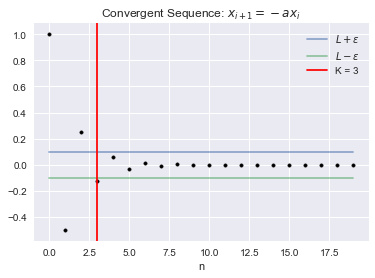

In [5]:
'''
Let's see what this looks like with the epsilon bounds and natrual number K
'''
t = np.arange(0,n)
U = np.asarray([0+eps for i in range(0,n)]) # epsilon + Limit
L = np.asarray([0-eps for i in range(0,n)]) # Limit - epsilon

plt.scatter(t, seq, c='k', marker='.')
plt.plot(t, U, alpha=0.6)
plt.plot(t, L, alpha=0.6)
plt.axvline(x = K, c='r')
plt.xlabel('n')
plt.title(r'Convergent Sequence: $x_{i+1} = - a x_i$')
plt.legend([r'$L + \epsilon$', r'$L-\epsilon$', 'K = '+str(int(K))], loc='upper right')
plt.show();

4.b)

To show $(x_n) \rightarrow 0$ we'll begin by enumerating some terms. Let $x_0 = 1$ and $x_{i+1} = - a x_i$ where $0 < a < 1$. We see that

$$\begin{align}
    x_0 & = 1 \\
    x_1 & = -a(1) = -a \\
    x_2 & = -a(-a) = a^2 \\
    x_3 & = -a(a^2) = -a^3 \\
    \vdots
\end{align}$$

Thus, we deduce that $x_n = (-a)^n$, where $0<a<1$ ensures the sequence vanishes in the limit (the smaller $a$, the faster this occurs). Furthermore, because $a \in (0,1)$, it can be expressed as the following: $a = \frac{1}{m}$ such that $m\in \mathbb{R}_+ - (0,1]$, where $\mathbb{R}_+$ denotes all the positive real numbers.

Next, fix any $\epsilon > 0$ and let 
$K =\begin{cases}
      0 & \text{if $\epsilon \geq 1$}\\
      \lfloor \frac{-\ln{(\epsilon)}}{\ln{(m)}} \rfloor & \text{if $\epsilon \in (0, 1)$}
    \end{cases}$. 
    
If $\epsilon \geq 1$, then there is nothing to prove. We just choose any $K > 0$. However, if $\epsilon \in (0,1)$ then for any $n > K$ we see that

$$\begin{align}
    \lvert (-a)^n - 0 \rvert &= a^n  \\
    & < {a^K} \\
    & = {a^{\frac{-\ln{(\epsilon)}}{\ln{(m)}}}} \\
    & = e^{{\frac{-\ln{(\epsilon)}}{\ln{(m)}}}(-\ln{(m)})}\text{ raising to the power of } e^{\ln{(\cdot)}} \text{ and plugging in $a=\frac{1}{m}$}\\
    & = \epsilon.
\end{align}$$

### 5. Continuous Functions (10pts)

Define the function $s$ by

$$
s(x) = \left \{
\begin{array}{ll}
-1 & \mathrm{if}\;x<0 \\
0 & \mathrm{if}\;x = 0 \\
1 & \mathrm{if}\;x > 0
\end{array}
\right .
$$

a) Find a sequence $(x_n)$ converges to $0$ but where $(s(x_n))$ does not converge. Conclude that $s$ is not continuous at $0$. 

b) Show that $s$ is continuous at all other points in $\mathbb{R}$.

$\textbf{Grading breakdown:}$

    2pts for finding an (x_n) that converges to 0
    2pts for showing that s(x_n) does not converge
    2pts for proving that s is not continuous at 0
    2pts for using the definition of pointwise continuity in (b)
    2pts for providing a convincing proof for (b)

5.a)  

Let $x_n = \frac{\sin{(n)}}{n+1}$ for $n\in\mathbb{N}$. If $a_n = \frac{-1}{n+1}$ and $b_n = \frac{1}{n+1}$, then by the squeeze theorem, $x_n \rightarrow 0$ as $n\rightarrow \infty$. However, $(s(x_n))$ will continue to oscillate between $-1$ and $1$ as $n \rightarrow \infty$, and, consequently, its limit doesn't exist. Therefore, $s(x_n)\not \rightarrow s(0)=0$ as $n\rightarrow \infty$. Thus, $s$ is not continuous at $0$. 

5.b) 

Remeber from lecture that a function $f : A \rightarrow \mathbb{R}$ is continuous at a **point** $c$ if and only if for any sequence $(x_n)$ that converges to a value $c$, the sequence $(f(x_n))$ converges to $f(c)$. That is, $\forall (x_n)$ such that

$$
\lim \limits_{n\rightarrow \infty} x_n = c \Rightarrow \lim \limits_{n \rightarrow \infty}f(x_n) = f(c) .
$$

We will also use the fact that $$\lim \limits_{n \rightarrow \infty}s(x_n) = s(\lim \limits_{n \rightarrow \infty}x_n).$$

Let $(c_n)$ be any sequence that converges to a value $c\in \mathbb{R}$ such that $c < 0$, and let $(d_n)$ be any sequence that converges to a value  $d\in \mathbb{R}$ such that $d > 0$. Then

$$
\lim \limits_{n\rightarrow \infty} c_n = c \Rightarrow \lim \limits_{n \rightarrow \infty}s(c_n) = s(c) = -1 
$$
for any such $c$, and
$$
\lim \limits_{n\rightarrow \infty} d_n = d \Rightarrow \lim \limits_{n \rightarrow \infty}s(d_n) = s(d) = 1 
$$
for any such $d$. Thus, $s$ is continuous in $$\{\forall c : c\in \mathbb{R}, c < 0 \} \cup \{\forall d : d\in \mathbb{R}, d > 0 \} = \mathbb{R} - \{0\}.$$

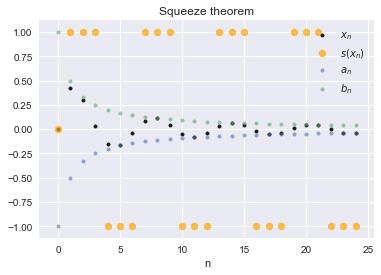

In [6]:
'''We can visualize this by implementing the following code'''

num = 25
n = np.arange(0,num)
xn = [sm.sin(n) / (n + 1) for n in range(0,num)] #(x_n) sequence
sn = []
for element in xn: #Build our s(x_n) according to its definition
    if element < 0:
        sn.append(-1)
    elif element > 0:
        sn.append(1)
    else:
        sn.append(0)

#Sequences for the Squeeze Thm
an = [-1 / (i+1) for i in n]
bn = [1 / (i+1) for i in n]

plt.scatter(n, xn, c='k', alpha = 0.9, marker='.')
plt.scatter(n, sn, c='orange', alpha=0.7)
plt.scatter(n, an, alpha=0.6, marker='.')
plt.scatter(n, bn, alpha=0.6 , marker='.')
plt.xlabel('n')
plt.title('Squeeze theorem')
plt.legend([r'$x_n$',r'$s(x_n)$',r'$a_n$' , r'$b_n$'], loc='upper right')
plt.show();

5.b)

### 6. Mean Value Theorem

Suppose $f'(x) \geq 0$ for all $x$. Use the mean value theorem to show that if $x_1 \leq x_2$, then $f(x_1) \leq f(x_2)$. 

$\textbf{Grading breakdown:}$

    4pts for using the MVT
    2pts for stating the assumptions: (1) f'(x) >= 0 for all x and (2) x1 < x2 
    4pts for providing a convincing proof using logical reasoning

6)

Assume $f'(x) \geq 0 \text{, } \forall x\in \mathbb{R}.$ We pick any two $x_1,x_2\in \mathbb{R}$ such that $ x_1 \leq x_2.$ By the MVT, there $\exists c\in (x_1,x_2)$ such that $$f'(c) = \frac{f(x_2)-f(x_1)}{x_2-x_1},$$ which can be reexpressed as $$f(x_2)-f(x_1) = f'(c)(x_2-x_1).$$ Since $f'(x) \geq 0$ and $x_1 \leq x_2$ implies that $$(x_2-x_1) \geq 0,$$ that means, $f(x_2) - f(x_1) \geq 0$, and our result follows: $$f(x_2) \geq f(x_1).$$

### 7. Finding Roots Using the Bisection Method

Write a function that implements the "bisection method" for finding the roots of function. The signature of your function should look like

```python
def find_root(f,a,b,n):
```
where $n$ is the maximum number of iterations of to search for the root.

The code should follow this algorithm:

- We are given a continuous function $f$ and numbers $a$ and $b$ and with $a < b$ with $f(a) < 0 < f(b)$. From the intermediate value theorem we know that there exists a $c$ with $a<c<b$ with $f(c) = 0$. We want to find $c$.

- Set $a_1 = a$ and $b_1 = b$ and $m = \frac{1}{2}(a+b)$. 

- For $i = 1$ to $n$ do
    - If $f(m) = 0$, then $c = m$ so break and return $m$.
    - Else If $f(m) > 0$ then set $a_{i+1} = a_i$ and $b_{i+1} = m$.
    - Else If $f(m) < 0$, then set $a_{i+1} = m_i$ and $b_{i+1} = b_i$.


- Return m

Test on several examples, including one in which the first 'if' statement is true, and another where it is never true. Check your work by plotting the results.

$\textbf{Grading breakdown:}$

    2pts for constructing a function find_root(f,a,b,n)
    1pt for providing a docstring
    3pts for translating the provided pseudocode into a working bisection method
    2pts for examples, one in which the first 'if' statement is true, and another where it is never true.
    2pts for plotting the results of these examples

In [6]:
def find_root(f,a,b,n):
    '''Assumes f is the continuous function of interest, a < b are the left and right endpoints 
    in the search interval, respectively, and n is the max number of iterations.
    Returns m, the approximated root of the function'''
    if f(a) * f(b) >= 0:
        return print("Invalid input: a,b must satisfy f(a) <= 0 <= f(b) or f(b) <= 0 <= f(a)..")
    
    for n in range(0,n):
        m = (a + b)/2
        f_m = f(m)        
        
        if f_m == 0: #Exact solution
            print('Exact: r = ', m)
            return m
        
        elif f(a)*f_m < 0:
            b = m
            
        elif f(b)*f_m < 0:
            a = m
        
        else:
            return print("Bisection method fails.")
        
    m = (a + b) / 2
    print('r = ', (a + b)/2)
    return m
            
func1 = lambda x: x**3
func2 = lambda x: np.sin(3*np.cos(x))
func3 = lambda x: np.cos(x**2)

r1 = find_root(func1, -0.1, 0.1, 100)
r2 = find_root(func2, 1, 1.7, 100)
r3 = find_root(func3, -2.5, -2, 100)

Exact: r =  0.0
r =  1.5707963267948966
r =  -2.1708037636748028


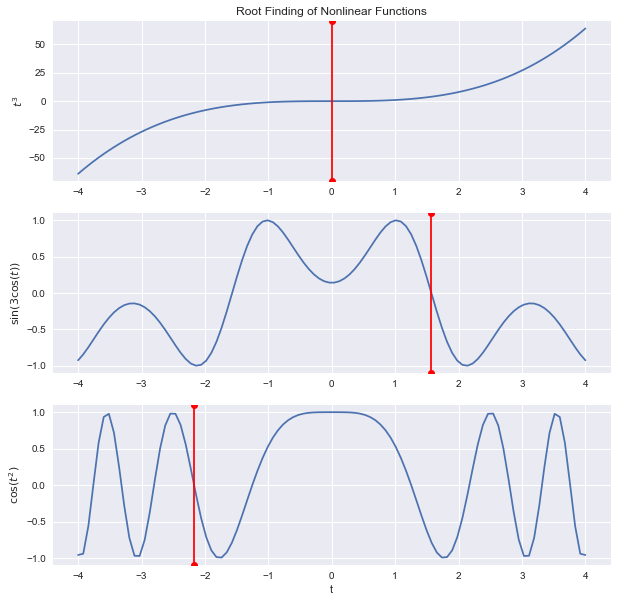

In [8]:
t = np.linspace(-4,4,100)

fig,ax = plt.subplots(3,1, figsize=(10,10))

ax[0].plot(t,func1(t)); ax[0].set_title("Root Finding of Nonlinear Functions"); ax[0].set_ylabel(r'$t^3$'); ax[0].grid('on')
ax[0].axvline(x = r1, c='r', marker='o')

ax[1].plot(t,func2(t)); ax[1].set_ylabel(r'$\sin{(3\cos{(t)})}$'); ax[1].grid('on')
ax[1].axvline(x = r2, c='r', marker='o')

ax[2].plot(t,func3(t)); ax[2].set_ylabel(r'$\cos{(t^2)}$'); ax[2].grid('on')
ax[2].axvline(x = r3, c='r', marker='o')

plt.xlabel('t')
plt.show()

### 8. Definition of Derivative

Use the definition of the derivative to find the derivatives of the following functions.

a) $f(x) = x^3$, for any $x$

b) $g(x) = 1/x$, for $x \neq 0$

c) $h(x) = \sqrt{x}$, for $x > 0$

d) $k(x) = x^{-1/2}$ for $x > 0$.

$\textbf{Grading breakdown:}$

    2pts per question for stating and using the definition of the derivative
    2pts for finding the right answers

Recall the definition of the derivative:

Let $I$ be an interval, $f : I \rightarrow \mathbb{R}$, and $c\in I$. If $C$ is the collection of points at which f is differrentiable, then the derivative of $f$ is the function $f' : C \rightarrow \mathbb{R}$ where $$f'(c) = \lim \limits_{x\rightarrow c} \frac{f(x) - f(c)}{x-c}.$$

Alternatively, this version of the definition could also be used:
$$f'(x) = \lim \limits_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}.$$

8.a) 

Check via derivative rules: $f'(x) = 3x^2, \text{ } \forall x\in \mathbb{R}$.

$f'(c) = \lim \limits_{x\rightarrow c} \frac{x^3 - c^3}{x-c} = \lim \limits_{x\rightarrow c} \frac{(x-c)(x^2 + c^2 + xc)}{x-c} = \lim \limits_{x\rightarrow c} (x^2 + c^2 + xc) = 3c^2 \implies f'(x) = 3x^2.$

8.b) 

Check via derivative rules: $g'(x) = -\frac{1}{x^2} \text{, for } x\neq 0.$

$g'(c) = \lim \limits_{x\rightarrow c} \frac{\frac{1}{x} - \frac{1}{c}}{x-c} = \lim \limits_{x\rightarrow c} \frac{c-x}{xc(x-c)} = \frac{-1}{c^2} \implies g'(x) = -\frac{1}{x^2} \text{, for } x\neq 0.$

8.c) 

Check via derivative rules: $h'(x) = \frac{1}{2}\frac{1}{\sqrt{x}}\text{, for } x>0$.

$h'(c) = \lim \limits_{x\rightarrow c} \frac{(\sqrt{x} - \sqrt{c})}{x-c} = \lim \limits_{x\rightarrow c} \frac{(\sqrt{x} - \sqrt{c})(\sqrt{x} + \sqrt{c})}{(x-c)(\sqrt{x} + \sqrt{c})} = \lim \limits_{x\rightarrow c} \frac{1}{(\sqrt{x} + \sqrt{c})} = \frac{1}{2}\frac{1}{\sqrt{c}} \implies h'(x) = \frac{1}{2}\frac{1}{\sqrt{x}}\text{, for } x>0.$

8.d) 

Check via derivative rules: $k'(x) = \frac{-1}{2}\frac{1}{x^{\frac{3}{2}}} \text{, for } x>0$. 

$k'(c) = \lim \limits_{x\rightarrow c} \frac{\frac{1}{\sqrt{x}} - \frac{1}{\sqrt{c}}}{x-c} = \lim \limits_{x\rightarrow c} \frac{\frac{\sqrt{c} - \sqrt{x}}{\sqrt{xc}} (\sqrt{x} + \sqrt{c})}{(x-c)(\sqrt{x} + \sqrt{c})} = \lim \limits_{x\rightarrow c} \frac{-1}{\sqrt{xc}(\sqrt{x} + \sqrt{c})} = \frac{-1}{2}\frac{1}{c^{\frac{3}{2}}} \implies k'(x) = \frac{-1}{2}\frac{1}{x^{\frac{3}{2}}} \text{, for } x>0.$

### 9. The Chain Rule

Use the chain rule to find these deriviatives. Verify your results with `sympy`.

a) $f(x) = \frac{1}{1+x^2}$

b) $h(x) = (\sin x^k)^m$ for $m,k \in \mathbb{N}$

$\textbf{Grading breakdown:}$

    3pts per problem for using the chain rule to find the derivative and typing it in Latex
    2pts per problem for verifying the results in sympy

9.a) We can rewrite the function as $f(x) = (1+x^2)^{-1}$ to simplify the calculation. Applying the chain rule gives us:
$f'(x) = \frac{-2x}{(1+x^2)^2}$.

In [9]:
def f(x):
    return 1 / (1 + x**2)

sm.diff(f(x),x)

  -2⋅x   
─────────
        2
⎛ 2    ⎞ 
⎝x  + 1⎠ 

9.b) Applying the chain rule gives us $h'(x) = (m(\sin{x^k})^{m-1}) (\cos{x^k}) (kx^{k-1})$. Rearranging the terms gives us $=kmx^{k-1}(\sin{x^k})^{m-1}\cos{x^k}.$

In [10]:
def h(x):
    return (sm.sin(x**k))**m

sm.diff(h(x),x)

     k    ⎛ k⎞    ⎛ k⎞
2⋅k⋅x ⋅sin⎝x ⎠⋅cos⎝x ⎠
──────────────────────
          x           

### 10. The Mean Value Theorem

Use the mean value theorem to show that $|\sin x - \sin y| \leq |x-y|$ for all $x,y \in \mathbb{R}$. 

Visualize this problem with a plot.

$\textbf{Grading breakdown:}$
    
    2pts for considering the case when x=y (i.e. the bound is tight)
    4pts for using logical reasoning to show the inequality holds for x>y and x<y
    2pts for using the MVT
    2pts for visualizing this inequality in some way (many different possibilities here)

10)

First, notice that if $x=y$, we have $0 \leq 0$. Next, assume $x > y$. Now, by the MVT, there $\exists c\in (x,y)$ such that $$f(x) - f(y) = f'(c)(x - y).$$ This implies

$$\begin{align}
    \sin{(x)} - \sin{(y)} & = \cos{(c)}(x - y) \\ 
    \implies  \lvert \sin{(x)} - \sin{(y)} \rvert & = \lvert \cos{(c)}(x - y) \rvert \\
    \implies  \lvert \sin{(x)} - \sin{(y)} \rvert & \leq \lvert x - y \rvert. \\
\end{align}$$

The same inequality holds if $x < y$ by a very similar argument.

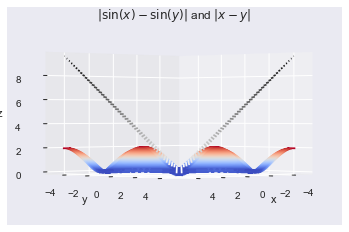

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z1 = np.abs(np.sin(X) - np.sin(Y))
Z2 = np.abs(X-Y)
ax.contour3D(X, Y, Z1, 50, cmap='coolwarm')
ax.contour3D(X, Y, Z2, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title(r'$ |\sin{(x)} - \sin{(y)}|$ and $|x-y|$')
ax.view_init(0, 45) #Mess around with these values to get different views

### 11. Taylor Approxmations

Use `sympy` to find the Taylor Approximations to $\sin x$ with 1 term, 2 terms, 3 terms, all the way up to 6 terms. Ignore the remainder term. Plot all of these approximations along with $\sin x$ on the same plot, showing the approximations get better and better. 

$\textbf{Grading breakdown:}$

    1pt per Taylor Approximation for finding its correct form (6pts total here) in sympy
    4pts for plotting all of the approximaitons along with sin(x) on the same plot

In [121]:
terms = 6
T = [sm.sin(k)] #base case f(k) where k is the point about the expansion and x, below, is the variable
for i in range(1, terms):
    taylor_term = T[i-1] + (1 / sm.factorial(i)) * sm.diff(sm.sin(k), k, i) * (x-k)**i
    T.append(taylor_term)
T

⎡                                            2                                
⎢                                    (-k + x) ⋅sin(k)                         
⎢sin(k), (-k + x)⋅cos(k) + sin(k), - ──────────────── + (-k + x)⋅cos(k) + sin(
⎣                                           2                                 

              3                  2                                            
      (-k + x) ⋅cos(k)   (-k + x) ⋅sin(k)                             (-k + x)
k), - ──────────────── - ──────────────── + (-k + x)⋅cos(k) + sin(k), ────────
             6                  2                                            2

4                  3                  2                                       
 ⋅sin(k)   (-k + x) ⋅cos(k)   (-k + x) ⋅sin(k)                             (-k
──────── - ──────────────── - ──────────────── + (-k + x)⋅cos(k) + sin(k), ───
4                 6                  2                                        

     5                  4                  3     

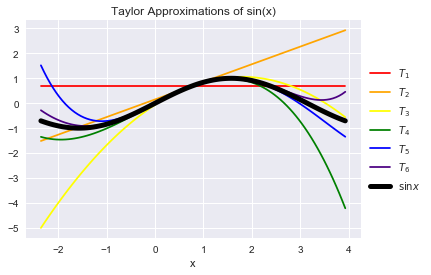

In [137]:
x0 = np.pi / 4 #point about the expansion. Try 0 and np.pi/2 as well
nums = np.linspace(x0 - np.pi, x0 + np.pi, 100)

#Taylor Terms
T1 = np.sin(x0)*(nums - x0)**0
T2 = T1 + np.cos(x0)*(nums - x0)**1
T3 = T2 - (1 / factorial(2))*np.sin(x0)*(nums - x0)**2
T4 = T3 - (1 / factorial(3))*np.cos(x0)*(nums - x0)**3
T5 = T4 + (1 / factorial(4))*np.sin(x0)*(nums - x0)**4
T6 = T5 + (1 / factorial(5))*np.cos(x0)*(nums - x0)**5

#Plotting parameters
parameters = zip([T1, T2, T3, T4, T5, T6],['r','orange','yellow','g','b','indigo'])

for Ti,c in parameters:
    plt.plot(nums, Ti, c=c)
    
plt.plot(nums, np.sin(nums), c='k', linewidth=5.0)
plt.legend([r'$T_1$',r'$T_2$',r'$T_3$',r'$T_4$',r'$T_5$',r'$T_6$',r'$\sin{x}$'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Taylor Approximations of sin(x)')
plt.xlabel('x')
plt.show()

### 12. Showing Inequalities With Taylor's Approximation.

Show that if $x>0$ then $1 + \frac{1}{2}x - \frac{1}{8}x^2 \leq \sqrt{1+x} \leq 1 + \frac{1}{2}x$. Hint, break this into two steps, one for each inequality. For the first step, use the first three terms of the Taylor approximation and a residual term that is cubic. For the second inequality, use the first two terms of the Taylor approximation and a residual term that is a square. Make sure to explain each step of your argument.

How good is this approximation for $\sqrt{2}$? How about $\sqrt{3}$? 

Visualize this problem by making a plot showing the relationship of the three expressions as $x$ increases.

$\textbf{Grading breakdown:}$

    2pts for Taylor expanding f(x) = sqrt(1 + x) around x0 = 0 
    2pts for using the expansions to establish the inequalities
    2pts for commenting on/showing how good of an approximation this is for sqrt(2) 
    2pts for commenting on/showing how good of an approximation this is for sqrt(3)
    2pts for visualizing the problem

12)

Remember from lecture, that if an approximation is desired, then you can use

$$
f(x) = f(x_0) + f'(x_0)(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + ... 
     + \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n
     + \frac{f^{(n+1)}(c)}{(n+1)!}(x-x_0)^{n+1}
$$

for some $c$ with $x < c < x_0$. 

So we let $f(x)=\sqrt{1+x}$, $x_0=0$, for $x>0$. Our strategy is to consider the first three terms in the Talyor expansion. We'll begin by computing some derivatives of $f(x)$:
$$\begin{align}
    f(x_0) &= \sqrt{1+x_0} = 1\\
    f'(x_0) &= \frac{1}{2}\frac{1}{\sqrt{1+x_0}} = \frac{1}{2}\\
    f''(x_0) &= \frac{-1}{4} \frac{1}{(1+x_0)^{3/2}} = \frac{-1}{4}\\
    f'''(c) &= \frac{3}{8} \frac{1}{(1+c)^{5/2}}.
\end{align}$$

Plugging into the approximation formula gives us
$$\begin{align}
    \sqrt{1+x} &= \sqrt{1+x_0} + \frac{1}{2}\frac{1}{\sqrt{1+x_0}}x - \frac{1}{8} \frac{1}{(1+x_0)^{3/2}}x^2 + \frac{3}{48} \frac{1}{(1+c)^{5/2}}x^3 \\
    & = 1 +\frac{1}{2}x - \frac{1}{8}x^2 + \frac{3}{8} \frac{1}{(1+c)^{5/2}}x^3.
\end{align}$$

which implies that
$$\sqrt{1+x} \geq 1 +\frac{1}{2}x - \frac{1}{8}x^2.$$

Next, we consider two Taylor terms and leave the remainder in the quadratic term:
$$\begin{align}
    f(x) &= \sqrt{1+x_0} + \frac{1}{2}\frac{1}{\sqrt{1+x_0}}x - \frac{1}{8} \frac{1}{(1+c)^{3/2}}x^2 \\
    & \leq 1 +\frac{1}{2}x.
\end{align}$$

Thus, we have shown that $$1 +\frac{1}{2}x - \frac{1}{8}x^2 \leq \sqrt{1+x} \leq 1 +\frac{1}{2}x.$$

Note that the bounds are tight if and only if $x = 0.$

If $x=1 \implies f(1) = \sqrt{2}.$ We see from our error bounds that 
$$1 + \frac{1}{2}(1) - \frac{1}{8}(1)^2 \leq  \sqrt{2} \leq 1 + \frac{1}{2}(1)$$
$$ \frac{11}{8} \leq  \sqrt{2} \leq \frac{3}{2}$$
$$ 1.375 \leq  1.4142135623730951 \leq 1.5. $$

Similarly, if $x=2 \implies f(2) = \sqrt{3}.$ We see from our error bounds that 
$$ 1 + \frac{1}{2}(2) - \frac{1}{8}(2)^2 \leq  \sqrt{2} \leq 1 + \frac{1}{2}(2) $$
$$ \frac{3}{2} \leq  \sqrt{3} \leq 2 $$
$$ 1.5 \leq  1.7320508075688772 \leq 2.0, $$ is worse than the bound for $\sqrt{2}$.

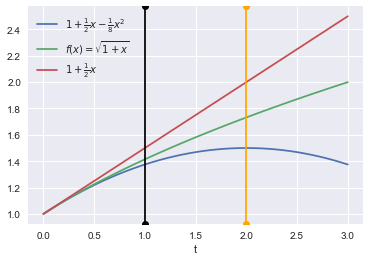

In [53]:
t = np.linspace(0,3,100)
t1 = lambda x: 1 + (1/2)*x - (1/8)*x**2
t2 = lambda x: np.sqrt(1 + x)
t3 = lambda x: 1 + (1/2)*x

plt.plot(t,t1(t))
plt.plot(t,t2(t))
plt.plot(t,t3(t))
plt.legend([r'$1+\frac{1}{2}x-\frac{1}{8}x^2$',r'$f(x)=\sqrt{1+x}$',r'$1+\frac{1}{2}x$'])
plt.xlabel('t')
plt.axvline(x=1, c='k', marker='o') # f(1) = sqrt(2)
plt.axvline(x=2, c='orange', marker='o') # f(2) = sqrt(3)
plt.show()

### 13. L'Hospital's Rule

Find expressions whose limits exist and correspond to each of the cases $0/0$, $\infty/\infty$, and $0^0$. Use `sympy` to evaluate these limits to show that it knows how to use L'Hospital's rule.

$\textbf{Grading breakdown:}$

    1pt per problem for finding and typing a valid expression in Latex
    2pts per problem for evaluating the limits in sympy 
    1pt for printing the evaluations out

13.a) 

Let $f_1(x) = \frac{\sin(x)}{x} \implies \lim \limits_{x\rightarrow 0}f_1(x)=\frac{0}{0}$. Using L'Hospital's rule we find that $\lim \limits_{x\rightarrow 0}\frac{\cos(x)}{1} = 1$.

Let $f_2(x) = \frac{x}{e^x} \implies \lim \limits_{x\rightarrow \infty}f_2(x)=\frac{\infty}{\infty}$. Using L'Hospital's rule we find that $\lim \limits_{x\rightarrow \infty}\frac{1}{e^x} = 0$.

Let $f_3(x) = x^x \implies \lim \limits_{x\rightarrow 0}f_3(x)=0^0$. Using L'Hospital's rule we find that $\lim \limits_{x\rightarrow 0} e^{\ln({x^x})} = e^{\lim \limits_{x\rightarrow 0}x\ln (x)} = e^{\lim \limits_{x\rightarrow 0}\frac{\ln (x)}{\frac{1}{x}} } = e^{\lim \limits_{x\rightarrow 0}-x } = 1$.

In [12]:
def f1(x):
    return sm.sin(x) / x

def f2(x):
    return x / sm.exp(x)

def f3(x):
    return x**x

sm.limit(f1(x), x, 0), sm.limit(f2(x), x, sm.oo), sm.limit(f3(x), x, 0)

(1, 0, 1)

### 14. Integral Approximation

a) Consider the function $f(x) = \sin(x) / x$ over the domain $[1,9]$. Make a plot similar to the following that shows how to approximate the function with a set of $n = 20$ rectangles. The rectangles should have width $dx = (b-a)/n$ and heights $f(a), \; f(a+dx), \; f(a+2dx), \dots$. 

![integral-approx](https://raw.githubusercontent.com/klavins/EE502P/master/imgaes/integral-approx.png)

b) Write a Python function that takes a function `f`, a starting point `a`, an ending point `b`, and a positive integer `n` and returns the approximation of the integral $\int_a^b f(x)dx$ that uses $n$ rectangles as defined in part (a). The signature of your function should look like

```python
def approx(f,a,b,n):
```

Demonstrate your function with the $f$ in part (a). 

c) Make a plot of `approx(f,a,b,n)` for $n = 1 \; \mathrm{to} \; 100$. Use `sympy` to evaluate the actual integral. For which value of $n$ is the integral within 1% error?

d) Use your function to make successive approximations to the integral $\int_0^1 \frac{1}{x} dx$ for $n=1$ to $20$, illustrating that the sequence does not converge.  

$\textbf{Grading breakdown:}$

    2pts (a) for plotting the Riemann sums and original function f(x)
    3pts (b) writting approx() using either left, right, or middle endpoint evaluation
    1pt (c) for plotting approx() from n=1 to n=100
    1pt (c) for finding the true value of the integral
    1pt (c) for finding the n that gives the integral to 1% error
    2pts (d) for using approx() to illustrate the integral does not converge (e.g. providing a plot, printing out values, ect.)

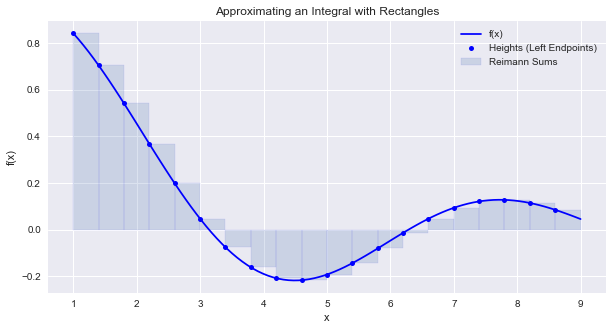

In [19]:
#1.a)

t = sm.symbols('t')
expr = sm.sin(t) / t # The symbolic function of interest

'''Initialize Riemann sums parameters'''
a = 1 # Starting point
b = 9 # Ending point
N = 20 # The # of rectangles
dx = (b-a) / N # The rectangle width
f = sm.lambdify(t, expr) # Allows for good numerical evaluation
x = np.linspace(a, b, N+1) # Evenly spaced positions for the rectangles
y = f(x) # The heights of the rectangles

'''Initialize Continuous Function parameters'''
X = np.linspace(a, b, 100) #points for the true, continuous function
Y = f(X)

'''Begin plotting'''
plt.figure(figsize=(10,5))

plt.plot(X, Y, 'b') #Plots the continuous function of interest
x_left = x[:-1] # Left endpoints (omits the last endpoint on 9)
y_left = y[:-1]
plt.plot(x_left, y_left, 'b.', markersize=10) #Plots the left endpoints' heights: f(a), f(a+dx), f(a+2dx),...
plt.bar(x_left, y_left, width=dx, alpha=0.2, align='edge', edgecolor='b') #Plots the rectungular Riemann sum
plt.title('Approximating an Integral with Rectangles')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','Heights (Left Endpoints)','Reimann Sums'])
plt.show()

In [20]:
#1.b)

def approx(f,a,b,n):
    '''Assumes f is a function, [a,b] is our mathematical interval, and n is the # of partitions
    Returns the Riemann Sum approximation to the integral of f using n partitions at the midpoint
    
    For left endpoint evaluation use this instead:
    
    dx = (b-a) / n
    riemann_sum = 0
    for i in range(0, n):
        riemann_sum += f(a + i*dx) * dx # height*width per rectangle
    return riemann_sum
    '''
    dx = (b - a) / n
    x = np.linspace(a, b, n+1)
    mid = (x[:-1] + x[1:]) / 2
    result = np.sum(f(mid) * dx)
    return result

approx(f,a,b,N)

0.7176559111690651

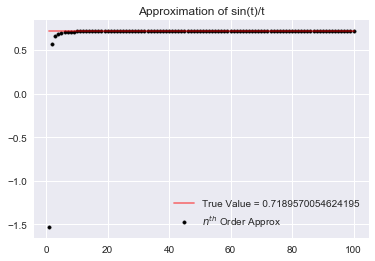

In [21]:
#1.c) 

n_parts = [j for j in range(1,101)]
approx_vals = np.asarray([approx(f,a,b,i) for i in range(1,101)])

F_true = sm.integrate(expr,(t,a,b))  
F_vals = F_true * np.ones_like(n_parts)

plt.scatter(n_parts, approx_vals, c='k', marker='.')
plt.plot(n_parts, F_vals, alpha=0.5, c='r')
plt.title('Approximation of '+str(expr))
plt.legend(['True Value = '+str(float(F_true)), r'$n^{th}$ Order Approx'])
plt.show()

In [29]:
tol = 0.01 # 1% error
parts = 1
error = np.abs(approx(f, a, b, parts) - float(F_true)) / float(F_true) #Error formula
while error  > tol:
    parts += 1
    error = np.abs(approx(f, a, b, parts) - float(F_true)) / float(F_true)
print('Partitions required for a', tol*100, '% error is', parts)

Partitions required for a 1.0 % error is 9


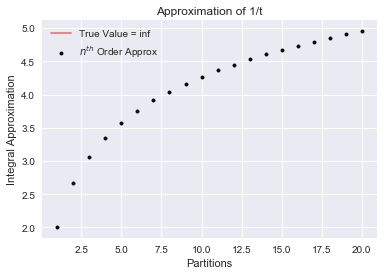

In [32]:
#13.d)

a2 = 0.0
b2 = 1
expr2 = 1 / t
f2 = sm.lambdify(t, expr2)

n_parts2 = [j for j in range(1,21)]
approx_vals2 = np.asarray([approx(f2,a2,b2,i) for i in range(1,21)])

F_true2 = sm.integrate(expr2,(t,a2,b2))  
F_vals2 = F_true2 * np.ones_like(n_parts2)

plt.scatter(n_parts2, approx_vals2, c='k', marker='.')
plt.plot(n_parts2, F_vals2, alpha=0.5, c='r')
plt.title('Approximation of '+str(expr2))
plt.legend(['True Value = '+str(float(F_true2)), r'$n^{th}$ Order Approx'])
plt.xlabel('Partitions')
plt.ylabel('Integral Approximation')
plt.show()